##TASK 1

1.1

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all')

In [ ]:
import nltk  
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [ ]:
docs = [d for d in   reuters.fileids()]

In [ ]:
reuters_data = [reuters.raw(doc_id) for doc_id in   docs]
reuters_label = [reuters.categories(doc_id)[0] for  doc_id in docs]

1.2

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#preprocessing of newsgroups dataset
newsgroups_processed = []

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

for article in newsgroups.data:
    words = word_tokenize(article.lower())

    processed_words = []
    for word in words:
        if word not in stop_words:
            stemmed_word = stemmer.stem(word)
            lemmatized_word = lemmatizer.lemmatize(stemmed_word)
            processed_words.append(lemmatized_word)

    processed_article = ' '.join(processed_words)
    newsgroups_processed.append(processed_article)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

KeyboardInterrupt



In [ ]:
#preprocessing of reuters dataset
reuters_processed = []
for article in reuters_data:

    words = word_tokenize(article.lower())

    processed_words = []
    for word in words:
        if word not in stop_words:
            stemmed_word = stemmer.stem(word)
            lemmatized_word = lemmatizer.lemmatize(stemmed_word)
            processed_words.append(lemmatized_word)

    processed_article = ' '.join(processed_words)
    reuters_processed.append(processed_article)

1.3

In [ ]:
#splitting of data
from sklearn.model_selection import train_test_split
X_train_reuters, X_test_reuters, y_train_reuters, y_test_reuters = train_test_split(reuters_processed, reuters_label, test_size=0.2, random_state=42)

In [ ]:
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(newsgroups_processed, newsgroups.target, test_size=0.2, random_state=42)

##Task 2

In [ ]:
#bag of words is used to convert the textual data in numerical form
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(reuters_processed)

X_train_reuters_bow = vectorizer.transform(X_train_reuters)
X_test_reuters_bow = vectorizer.transform(X_test_reuters)

In [ ]:
vectorizer.fit(newsgroups_processed)

X_train_news_bow = vectorizer.transform(X_train_news)
X_test_news_bow = vectorizer.transform(X_test_news)

##Task 3


#Naive Bayes

#reuters

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_reuters_bow, y_train_reuters)
nb_pred = nb.predict(X_test_reuters_bow)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
nb_precision = precision_score(y_test_reuters, nb_pred, average='macro', zero_division=1)
nb_acc = accuracy_score(y_test_reuters, nb_pred)
nb_recall = recall_score(y_test_reuters, nb_pred, average='macro', zero_division=1)
nb_f1 = f1_score(y_test_reuters, nb_pred, average='macro', zero_division=1)

print(f"Accuracy : {nb_acc}")
print(f"Precision : {nb_precision}")
print(f"recall : {nb_recall}")
print(f"f1 : {nb_f1}")

Accuracy : 0.8030583873957368
Precision : 0.9010478944035242
recall : 0.270297966864919
f1 : 0.2892173964068426


##newsgroup

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_news_bow, y_train_news)
nb_pred = nb.predict(X_test_news_bow)

In [ ]:
nb_precision = precision_score(y_test_news, nb_pred, average='macro', zero_division=1)
nb_acc = accuracy_score(y_test_news, nb_pred)
nb_recall = recall_score(y_test_news, nb_pred, average='macro', zero_division=1)
nb_f1 = f1_score(y_test_news, nb_pred, average='macro', zero_division=1)

print(f"Accuracy : {nb_acc}")
print(f"Precision : {nb_precision}")
print(f"recall : {nb_recall}")
print(f"f1 : {nb_f1}")

Accuracy : 0.8623342175066313
Precision : 0.8748332284484155
recall : 0.8600746497873217
f1 : 0.8533130102999655


#Logistic Regression

#reuters

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_reuters_bow, y_train_reuters)
lg_pred = lg.predict(X_test_reuters_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lg_precision = precision_score(y_test_reuters, lg_pred, average='macro', zero_division=1)
lg_acc = accuracy_score(y_test_reuters, lg_pred)
lg_recall = recall_score(y_test_reuters, lg_pred, average='macro', zero_division=1)
lg_f1 = f1_score(y_test_reuters, lg_pred, average='macro', zero_division=1)

print(f"Accuracy : {lg_acc}")
print(f"Precision : {lg_precision}")
print(f"recall : {lg_recall}")
print(f"f1 : {lg_f1}")

Accuracy : 0.8985171455050973
Precision : 0.8670663405939585
recall : 0.6595124681118025
f1 : 0.6680929247715099


#newsgroups

In [ ]:
lg = LogisticRegression()
lg.fit(X_train_news_bow, y_train_news)
lg_pred = lg.predict(X_test_news_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lg_precision = precision_score(y_test_news, lg_pred, average='macro', zero_division=1)
lg_acc = accuracy_score(y_test_news, lg_pred)
lg_recall = recall_score(y_test_news, lg_pred, average='macro', zero_division=1)
lg_f1 = f1_score(y_test_news, lg_pred, average='macro', zero_division=1)

print(f"Accuracy : {lg_acc}")
print(f"Precision : {lg_precision}")
print(f"recall : {lg_recall}")
print(f"f1 : {lg_f1}")

Accuracy : 0.8835543766578249
Precision : 0.8840708257522236
recall : 0.8819305817326185
f1 : 0.88273479780838


#SVM

##reuters

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_reuters_bow, y_train_reuters)
svm_pred = svm.predict(X_test_reuters_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svm_precision = precision_score(y_test_reuters, svm_pred, average='macro', zero_division=1)
svm_acc = accuracy_score(y_test_reuters, svm_pred)
svm_recall = recall_score(y_test_reuters, svm_pred, average='macro', zero_division=1)
svm_f1 = f1_score(y_test_reuters, svm_pred, average='macro', zero_division=1)

print(f"Accuracy : {svm_acc}")
print(f"Precision : {svm_precision}")
print(f"recall : {svm_recall}")
print(f"f1 : {svm_f1}")

Accuracy : 0.897126969416126
Precision : 0.8490360045562296
recall : 0.7022991235394137
f1 : 0.6886649535264855


##newsgroups

In [ ]:
svm = LinearSVC()
svm.fit(X_train_news_bow, y_train_news)
svm_pred = svm.predict(X_test_news_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svm_precision = precision_score(y_test_news, svm_pred, average='macro', zero_division=1)
svm_acc = accuracy_score(y_test_news, svm_pred)
svm_recall = recall_score(y_test_news, svm_pred, average='macro', zero_division=1)
svm_f1 = f1_score(y_test_news, svm_pred, average='macro', zero_division=1)

print(f"Accuracy : {svm_acc}")
print(f"Precision : {svm_precision}")
print(f"recall : {svm_recall}")
print(f"f1 : {svm_f1}")

Accuracy : 0.8740053050397878
Precision : 0.8752539112964408
recall : 0.8725698161510744
f1 : 0.8734104230235795


#Random Forest

##reuters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_reuters_bow, y_train_reuters)
rf_pred = rf.predict(X_test_reuters_bow)

In [ ]:
rf_precision = precision_score(y_test_reuters, rf_pred, average='macro', zero_division=1)
rf_acc = accuracy_score(y_test_reuters, rf_pred)
rf_recall = recall_score(y_test_reuters, rf_pred, average='macro', zero_division=1)
rf_f1 = f1_score(y_test_reuters, rf_pred, average='macro', zero_division=1)

print(f"Accuracy : {rf_acc}")
print(f"Precision : {rf_precision}")
print(f"recall : {rf_recall}")
print(f"f1 : {rf_f1}")

Accuracy : 0.835032437442076
Precision : 0.8766093441267114
recall : 0.4029233961280404
f1 : 0.4573670115425329


##newsgroups

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_news_bow, y_train_news)
rf_pred = rf.predict(X_test_news_bow)

In [ ]:
rf_precision = precision_score(y_test_news, rf_pred, average='macro', zero_division=1)
rf_acc = accuracy_score(y_test_news, rf_pred)
recall = recall_score(y_test_news, rf_pred, average='macro', zero_division=1)
f1 = f1_score(y_test_news, rf_pred, average='macro', zero_division=1)

print(f"Accuracy : {rf_acc}")
print(f"Precision : {rf_precision}")
print(f"recall : {rf_recall}")
print(f"f1 : {rf_f1}")

Accuracy : 0.8543766578249337
Precision : 0.862547564776883
recall : 0.8496954678432702
f1 : 0.8512352498817759


#Task 4

Analysis 

<BarContainer object of 4 artists>

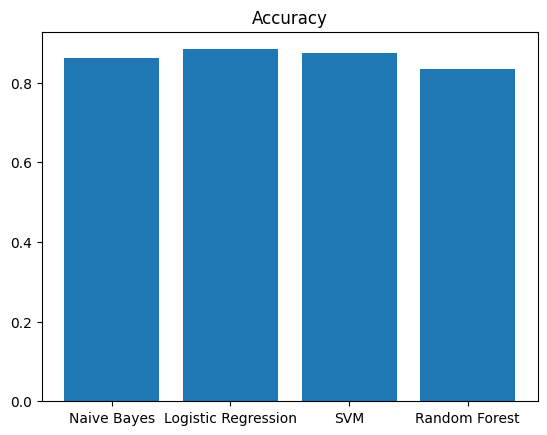

In [ ]:
import matplotlib.pyplot as plt
x = ['Naive Bayes','Logistic Regression','SVM','Random Forest']
y = [nb_acc,lg_acc,svm_acc,rf_acc]
plt.title('Accuracy')
plt.bar(x,y)

<BarContainer object of 4 artists>

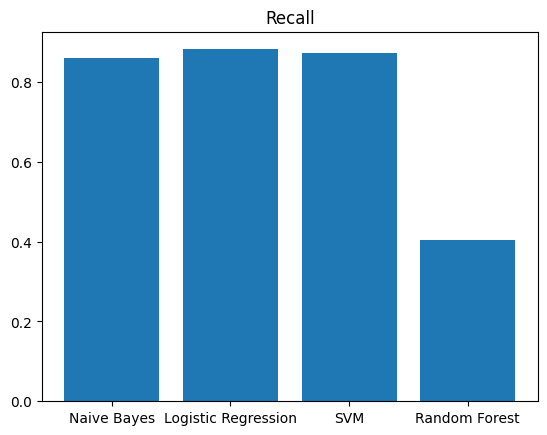

In [ ]:
x = ['Naive Bayes','Logistic Regression','SVM','Random Forest']
y = [nb_recall,lg_recall,svm_recall,rf_recall]
plt.title('Recall')
plt.bar(x,y)

<BarContainer object of 4 artists>

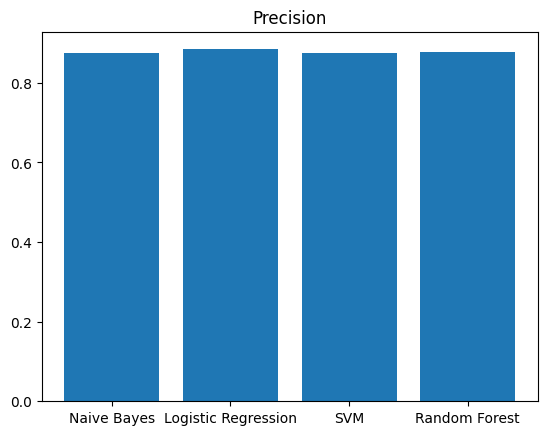

In [ ]:
x = ['Naive Bayes','Logistic Regression','SVM','Random Forest']
y = [nb_precision,lg_precision,svm_precision,rf_precision]
plt.title('Precision')
plt.bar(x,y)

<BarContainer object of 4 artists>

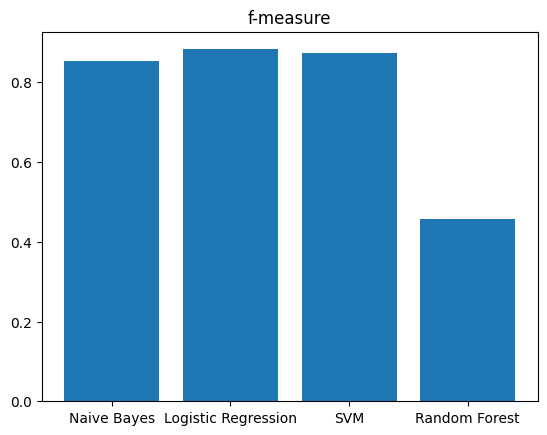

In [ ]:
x = ['Naive Bayes','Logistic Regression','SVM','Random Forest']
y = [nb_f1,lg_f1,svm_f1,rf_f1]
plt.title('f-measure')
plt.bar(x,y)